In [1]:
#앞서 학생들의 공부시간에 따른 예측 직선을 그리고자 기울기 a와 y절편 b를 구하였다
#하지만, 예측 직선을 이용해도 실제점수와 예측점수사이에는 약간의 오차가 존재했다
#이러한 차이가 생기는 이유는 공부한 시간 이외의 다른 요소가 성적에 영향을 끼쳤기 때문이다
#정확한 예측을 하려면 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측값을 구하려면 변수의 개수를 늘려 다중선형회귀를 만들어야 한다

In [2]:
#과외수업횟수 정보를 추가로 입력해보자

In [3]:
data = [[2,0,81], [4,4,93], [6,2,91], [8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #3D 그래프를 그려주는 라이브러리

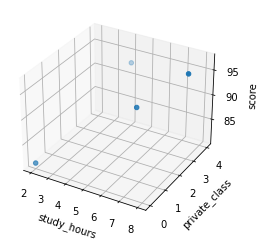

In [7]:
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')
ax.scatter(x1,x2,y)
plt.show()

In [13]:
#x1과 x2 각각의 기울기 a값이 다르므로 a1과 a2로 경사하강법을 적용하고 학습률을 곱해 기존의 값을 업데이트
import numpy as np

a1 = 0
a2 = 0
b=0

lr = 0.02

x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

y_pred = a1*x1_data + a2*x2_data + b #y구하는 식

error = y_data - y_pred #오차구하는 식

a1_diff = -(2/len(x1_data)) * sum(x1_data * error) #오차함수를 a1으로 미분한 값
a2_diff = -(2/len(x2_data) * sum(x2_data * error)) #오차함수를 a2으로 미분한 값
b_diff = -(2/len(x1_data) * sum(error)) #오차함수를 b로 미분한 값

a1 = a1 - lr*a1_diff
a2 = a2 - lr*a2_diff
b = b - lr*b_diff

### 코딩으로 확인하는 다중선형회귀

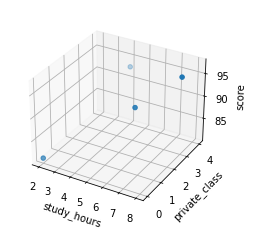

epoch = 0, 기울기1 = 18.5600, 기울기2 = 8.4500, y절편 = 3.6200
epoch = 100, 기울기1 = 7.2994, 기울기2 = 4.2867, y절편 = 38.0427
epoch = 200, 기울기1 = 4.5683, 기울기2 = 3.3451, y절편 = 56.7901
epoch = 300, 기울기1 = 3.1235, 기울기2 = 2.8463, y절편 = 66.7100
epoch = 400, 기울기1 = 2.3591, 기울기2 = 2.5823, y절편 = 71.9589
epoch = 500, 기울기1 = 1.9546, 기울기2 = 2.4427, y절편 = 74.7362
epoch = 600, 기울기1 = 1.7405, 기울기2 = 2.3688, y절편 = 76.2058
epoch = 700, 기울기1 = 1.6273, 기울기2 = 2.3297, y절편 = 76.9833
epoch = 800, 기울기1 = 1.5673, 기울기2 = 2.3090, y절편 = 77.3948
epoch = 900, 기울기1 = 1.5356, 기울기2 = 2.2980, y절편 = 77.6125
epoch = 1000, 기울기1 = 1.5189, 기울기2 = 2.2922, y절편 = 77.7277
epoch = 1100, 기울기1 = 1.5100, 기울기2 = 2.2892, y절편 = 77.7886
epoch = 1200, 기울기1 = 1.5053, 기울기2 = 2.2875, y절편 = 77.8209
epoch = 1300, 기울기1 = 1.5028, 기울기2 = 2.2867, y절편 = 77.8380
epoch = 1400, 기울기1 = 1.5015, 기울기2 = 2.2862, y절편 = 77.8470
epoch = 1500, 기울기1 = 1.5008, 기울기2 = 2.2860, y절편 = 77.8518
epoch = 1600, 기울기1 = 1.5004, 기울기2 = 2.2859, y절편 = 77.8543
epoch = 1700, 기울기1 = 1.500

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#공부시간 x1, 과외수업횟수 x2, 성적 y
data = [[2,0,81], [4,4,93], [6,2,91], [8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

#그래프로 확인
ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

#리스트로 되어있는 데이터를 넘파이 배열로 바꾸기 (하나씩 불러와 계산할 수 있도록 하기위함)
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

#기울기와 y절편 값 초기화
a1 = 0
a2 = 0
b = 0

#학습률
lr = 0.02

#몇번 반복할 것인지
epochs = 2001

#경사하강법 시작
for i in range(epochs):
    y_pred = a1*x1_data + a2*x2_data + b
    error = y_data - y_pred 
    
    a1_diff = -(2/len(x1_data)) * sum(error * x1_data)
    a2_diff = -(2/len(x2_data)) * sum(error * x2_data)
    b_diff = -(2/len(x1_data)) * sum(error)
    
    a1 = a1 - lr*a1_diff
    a2 = a2 - lr*a2_diff
    b = b - lr*b_diff
    
    if i%100 == 0:
        print('epoch = %.f, 기울기1 = %.04f, 기울기2 = %.04f, y절편 = %.04f' %(i, a1, a2, b))